In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
##Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
##Step 2: Load the Data
# Mount Google Drive to access the data
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV files for before and after landslides
df_before = pd.read_csv('/content/drive/MyDrive/Landslide/Before.csv')
df_after = pd.read_csv('/content/drive/MyDrive/Landslide/after.csv')

# Check the data
print("Before landslide data:")
print(df_before.head())

print("After landslide data:")
print(df_after.head())

# Merge the two DataFrames based on the X, Y coordinates
merged_df = pd.merge(df_before, df_after, on=['X', 'Y'], suffixes=('_before', '_after'))

# Verify the merged DataFrame
print("Merged Data:")
print(merged_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Before landslide data:
   FID           Z        Y          X
0    0 -393.915008  6.57727  36.728102
1    1 -501.903992  6.57727  36.728234
2    2 -481.282989  6.57727  36.728366
3    3 -490.964996  6.57727  36.728498
4    4 -518.476990  6.57727  36.728630
After landslide data:
   FID           Z        Y          X
0    1 -697.296021  6.57727  36.728102
1    2 -502.027008  6.57727  36.728234
2    3  132.171005  6.57727  36.728366
3    4  396.532013  6.57727  36.728498
4    5  149.852997  6.57727  36.728630
Merged Data:
   FID_before    Z_before        Y          X  FID_after     Z_after
0           0 -393.915008  6.57727  36.728102          1 -697.296021
1           1 -501.903992  6.57727  36.728234          2 -502.027008
2           2 -481.282989  6.57727  36.728366          3  132.171005
3           3 -490.964996  6.57727  36.728498          4  396.532013


In [4]:
##Step 3: Calculate Displacement Change
# Check if the merge was successful
if not merged_df.empty:
    # Calculate displacement change
    merged_df['displacement_change'] = merged_df['Z_after'] - merged_df['Z_before']
    print("Displacement Change:")
    print(merged_df[['X', 'Y', 'displacement_change']])
else:
    print("No matching rows found after merging. Check X and Y for discrepancies.")


Displacement Change:
                 X         Y  displacement_change
0        36.728102  6.577270          -303.381012
1        36.728234  6.577270            -0.123016
2        36.728366  6.577270           613.453995
3        36.728498  6.577270           887.497009
4        36.728630  6.577270           668.329987
...            ...       ...                  ...
1048570  37.121610  6.501179          -765.240814
1048571  37.121742  6.501179          -657.383171
1048572  37.121874  6.501179          -632.021072
1048573  37.122006  6.501179          -544.820793
1048574  37.122138  6.501179          -624.032173

[1048575 rows x 3 columns]


In [5]:
##Step 4: Prepare Data for Random Forest
# Define features and target
features = ['Z_before', 'X', 'Y']  # Adjust if you want to include other features
X = merged_df[features]
y = merged_df['displacement_change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
##Step 5: Train the Random Forest Model
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 49690.467040753574
R^2 Score: 0.8700767958355217


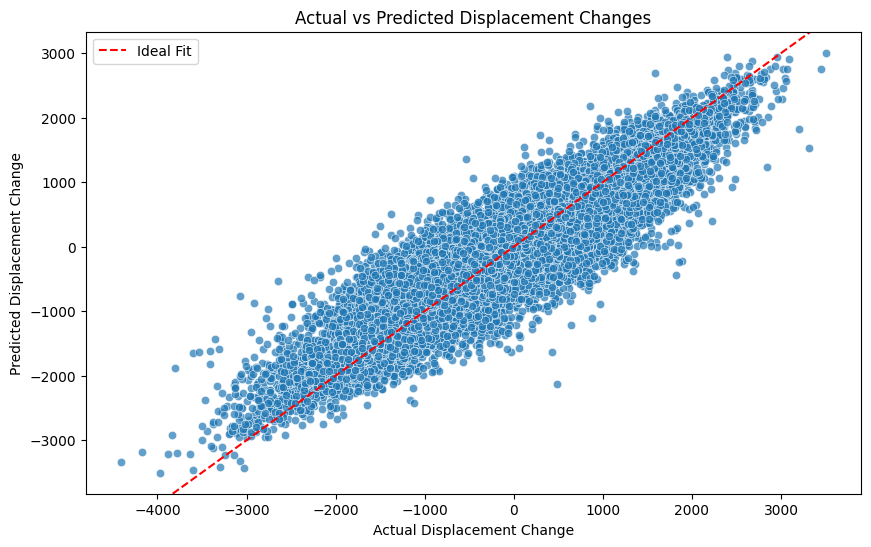

In [7]:
##Step 6: Visualize Results Scatter Plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Displacement Change")
plt.ylabel("Predicted Displacement Change")
plt.title("Actual vs Predicted Displacement Changes")
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Ideal Fit')
plt.legend()
plt.show()


In [8]:
## Step 7: Predict New Displacement Changes
# Example new data
new_data = pd.DataFrame({
    'Z_before': [1.5, 2.2, 3.1],  # Replace with actual values
    'X': [100, 105, 110],         # Replace with actual values
    'Y': [200, 205, 210]          # Replace with actual values
})

# Predict displacement changes
predicted_changes = model.predict(new_data)
new_data['Predicted_Displacement_Change'] = predicted_changes
print(new_data)


   Z_before    X    Y  Predicted_Displacement_Change
0       1.5  100  200                     163.567884
1       2.2  105  205                     195.012100
2       3.1  110  210                     207.242966


In [ ]:
## Hyperparameter Tuning: You can tune n_estimators, max_depth, or other hyperparameters using grid search or randomized search for better results.

## Additional Features: If you have geospatial or environmental features (e.g., slope, soil type), include them for improved prediction